# World Temperature

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from math import *
from util import *

plt.rcParams["figure.figsize"] = (8, 6)
palette = sns.color_palette()

## Parseo de datos

In [10]:
df = pd.read_csv('data/worldTemperature.csv')

fechas = list(df['year'])
temps = list(df['temp'])

#res = cml(lambda x: [x*2, x], [1,2,3], [1,1,1])
#res(5)

## f(x) = w1\*x + w2\*1

0.163376334191


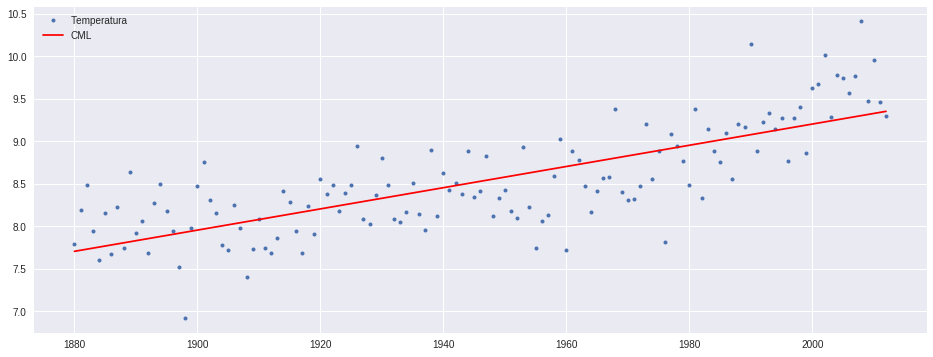

In [11]:
funcionCML = cml(lambda x: [x, 1], fechas, temps)
results = list(map(funcionCML, fechas))

plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
plt.plot(fechas, results, 'r', label='CML')
plt.legend()
print(ecm(results, temps))

## f(x) = w1\*x^2 + w2\*x + w3\*1

0.132319040187


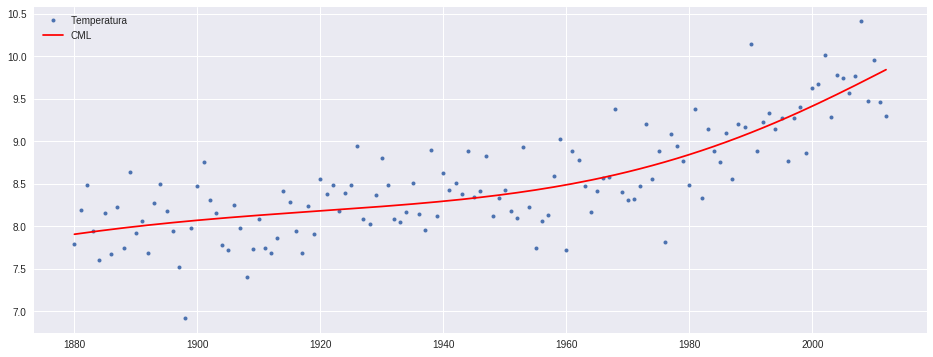

In [12]:
f = cml(poly(30), fechas, temps)
results = list(map(f, fechas))

plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
plt.plot(fechas, results, 'r', label='CML')
plt.legend()
print(ecm(results, temps))

## f(x) con grado harcodeado

1 0 1.43895220469
1 1 0.180314756511
1 2 0.245850437342
1 3 1.37348476385
3 0 21.6300524809
3 1 0.329202470485
3 2 0.879824058415
3 3 15.0414897239


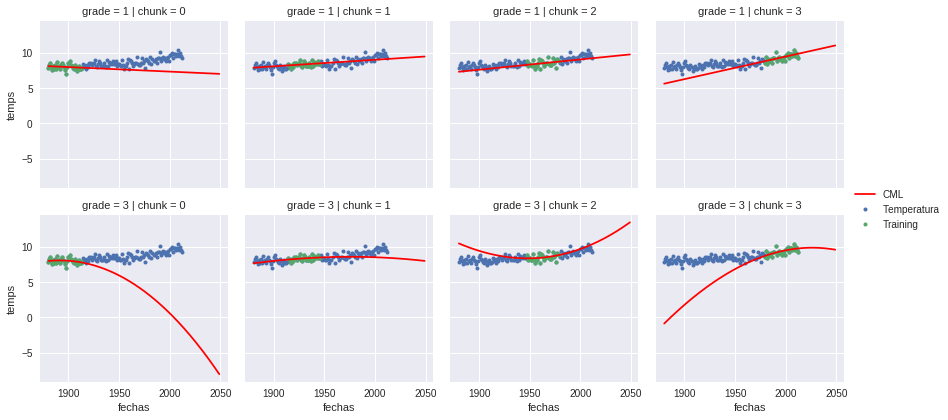

In [13]:
n = 66
lol = fechas + list(range(2013, 2050))
grados = [1, 3]
fechas_c = np.array_split(fechas, 4)
temps_c = np.array_split(temps, 4)
data = []
for g in grados:
    for c in range(4):
        f = cml(poly(g), fechas_c[c], temps_c[c])
        results = list(map(f, lol))
        data.append([results, g, c])
        print(g, c, ecm(list(map(f, fechas)), temps))

df2 = pd.DataFrame(data, columns=['x', 'grade', 'chunk'])

def pp(x, y, data, **kwargs):
    c = data['chunk'].values[0]
    plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
    plt.plot(fechas_c[c], temps_c[c], 'o', label='Training', markersize=4)
    plt.plot(lol, data['x'].values[0], 'r', label='CML')
    
l = sns.FacetGrid(df2, col="chunk", row="grade", size=3)
l.map_dataframe(pp, 'fechas', 'temps')
l.add_legend()

# ECM vs Grado de polinomio

(0.13231904018740376, 30)


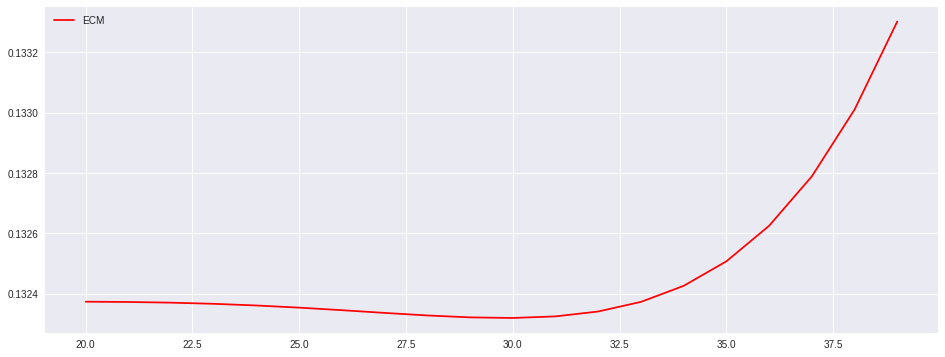

In [14]:
ecms = []

grados = range(20, 40, 1)
for grado in grados:
    f = cml(poly(grado), fechas, temps)
    results = list(map(f, fechas))
    ecms.append(ecm(results, temps))
    
m = min(zip(ecms, grados), key=lambda x: x[0])
print(m)

plt.plot(grados, ecms, 'r', label='ECM')
#plt.plot(fechas, results, 'r', label='CML')
plt.legend()

## Mido cuando comienza el calentamiento global

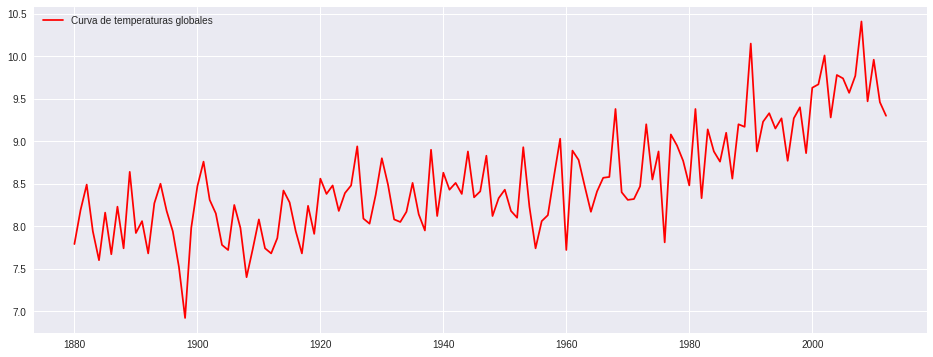

In [15]:
plt.plot(fechas, temps, 'r', label='Curva de temperaturas globales')
plt.legend()
plt.show()

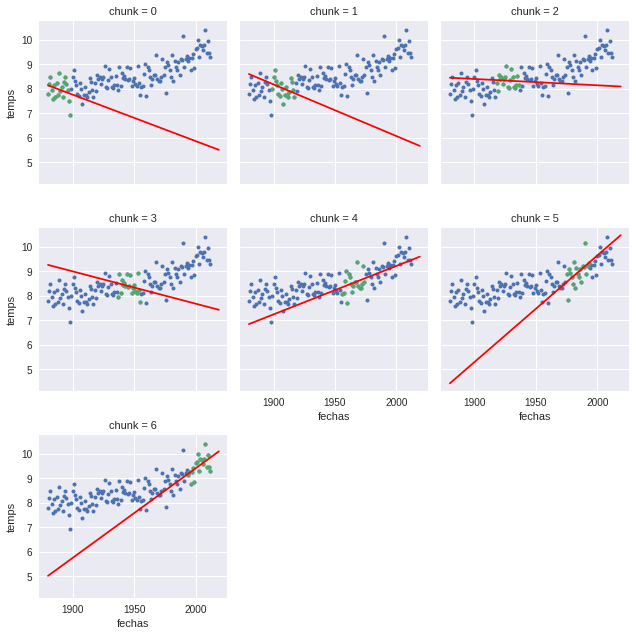

In [12]:
#Parto en 7 chuncks de 20 años (aprox) y veo las pendientes
fechasChunk = np.array_split(fechas,7)
tempChunk = np.array_split(temps,7)

fechasMasRango = fechas + list(range(2013,2020))

data = []
for c in range(7):
    f = cml(poly(1), fechasChunk[c], tempChunk[c])
    results = list(map(f, fechasMasRango))
    data.append([results, c])

df3 = pd.DataFrame(data, columns=['x', 'chunk'])

def pp(x, y, data, **kwargs):
    c = data['chunk'].values[0]
    plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
    plt.plot(fechasChunk[c], tempChunk[c], 'o', label='Training', markersize=4)
    plt.plot(fechasMasRango, data['x'].values[0], 'r', label='CML')
    plt.legend()

l = sns.FacetGrid(df3, col="chunk", col_wrap = 3)
l.map_dataframe(pp, 'fechas', 'temps')

ecm chunk nro 0 =  0.0451151960044
ecm chunk nro 1 =  0.0823061550138
ecm chunk nro 2 =  0.0356803000797
ecm chunk nro 3 =  0.000225620988068
ecm chunk nro 4 =  0.272825842235
ecm chunk nro 5 =  0.020633043931
ecm chunk nro 6 =  0.0231767754979
ecm chunk nro 7 =  0.0701895402154
ecm chunk nro 8 =  0.156865997241


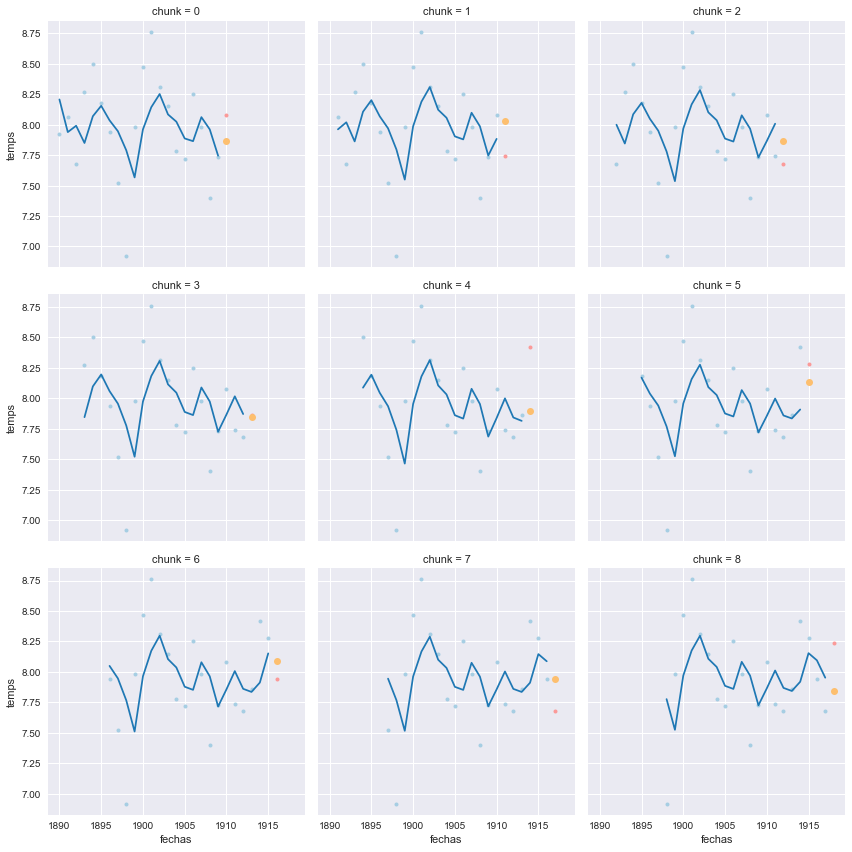

In [61]:
palette = sns.color_palette('Paired', 12)

k = 4  #cantidad de valores anteriores para AR

df = pd.read_csv('data/worldTemperature.csv')
df = colapsarK(df, 'temp', k)
nameCols = ['prev'+str(i) for i in range(1,k+1)]

def foo2(df, offset):
    df_t = df[df['year'] < offset + 20]
    df_t = df_t[df_t['year'] >= offset]
    df_r = df[df['year'] == offset + 20]
    xs = df_t[nameCols].as_matrix()
    f = cml(lambda x: [1, x[0]], xs, df_t['temp'])
    results_t = list(map(f, df_t[nameCols].as_matrix()))
    
    results_r = list(map(f, df_r[nameCols].as_matrix()))
    
    return (results_t, results_r, df_t, df_r)

def foo(df,arrOff):
    allResults = []
    for o in arrOff:
        # Hago esto porque me esta editando el dataframe cada vez
        # y no me sirve
        newDf = df.copy(deep=True)
        allResults.append(foo2(newDf,o))
    return allResults
    
allResults = foo(df,list(range(1890, 1899)))

#genero un dataframe resultados | chunks
data = []
for i in range(len(allResults)):
    data.append([allResults[i][0] + allResults[i][1] , i])

ndf = pd.DataFrame(data,columns=['x','chunk'])

def pp(x, y, data, **kwargs):
    c = data['chunk'].values[0]

    #Dejo esto como comentario para que vean que se esta imprimiendo
    plt.plot(allResults[c][2]['year'], allResults[c][2]['temp'], 'o', label='Training', markersize=4, color=palette[0])
    plt.plot(allResults[c][3]['year'], allResults[c][3]['temp'], 'o', label='Test', markersize=4, color=palette[4])

    plt.plot(allResults[c][2]['year'], allResults[c][0], 'r', label='CML Test', color=palette[1])
    plt.plot(allResults[c][3]['year'], allResults[c][1], 'o', label='CML Result', color=palette[6])
    plt.legend()
    print("ecm chunk nro " + str(c) + " = ", ecm(allResults[c][1], allResults[c][3]['temp']))
    #plt.title('{} | ECM = {} '.format('World', ecm_error))

l = sns.FacetGrid(ndf, col="chunk", col_wrap=2, size=4)
l.map_dataframe(pp, 'fechas', 'temps')

In [75]:
df = pd.read_csv('data/worldTemperature.csv')
df = colapsarK(df, 'temp', k)
nameCols = ['prev'+str(i) for i in range(1,k+1)]

errors = []
for d in range(1880, 1990):
    _, [x], _, df_r = foo2(df, d)
    errors.append((x - df_r['temp'].iloc[0])**2)
sum(errors)/len(range(1880, 1990))

0.17427981759169373

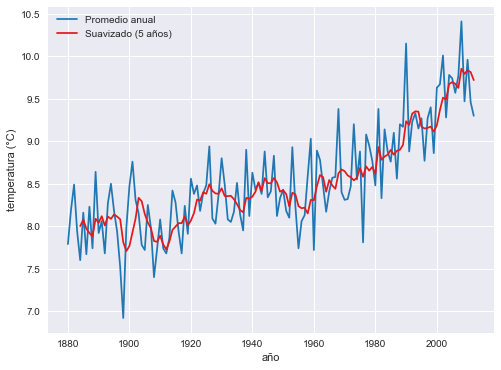

In [29]:
palette = sns.color_palette('Paired')
df = pd.read_csv('data/worldTemperature.csv')
df['rolling'] = df.rolling(5)['temp'].mean()

plt.plot(df['year'], df['temp'], 'r', label='Promedio anual', color=palette[1])
plt.plot(df['year'], df['rolling'], 'r', label='Suavizado (5 años)', color=palette[5])
plt.xlabel('año')
plt.ylabel('temperatura (°C)')
plt.legend()
plt.savefig('world_temp.png', dpi=300)

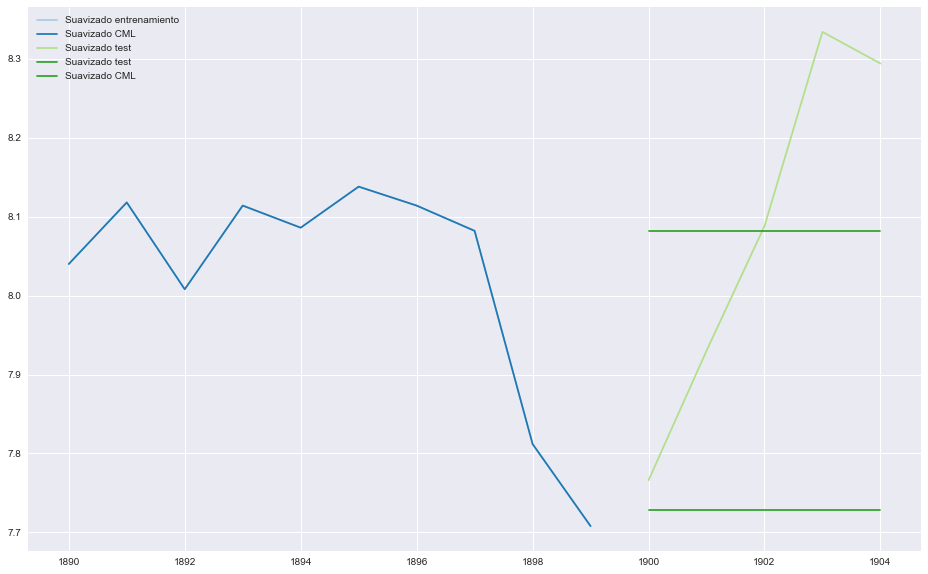

In [60]:
df2 = colapsarK(df, 'rolling', 2, drop=False)
df2 = df2[df2.index > 5]
year = 1890
training_size = 10
test_size = 5

df_training = df2[(df2['year'] >= year) & (df2['year'] < year + training_size)]
f = cml(lambda x: [1, x[0], x[1]], df2[['prev1', 'prev2']].as_matrix(), df2['rolling'])

df_test = df2[(df2['year'] >= year + training_size) & (df2['year'] < year + training_size + test_size)]
results_training = list(map(f, df_training[['prev1','prev2']].as_matrix()))
result = f(df_test[['prev1', 'prev2']].as_matrix()[0])
mean = df_test['rolling'].aggregate('mean')

plt.plot(df_training['year'], df_training['rolling'], 'r', label='Suavizado entrenamiento', markersize=4, color=palette[0])
plt.plot(df_training['year'], df_training['rolling'], 'r', label='Suavizado CML', markersize=4, color=palette[1])
plt.plot(df_test['year'], df_test['rolling'], 'r', label='Suavizado test', markersize=4, color=palette[2])
plt.plot(df_test['year'], [mean] * test_size, 'r', label='Suavizado test', markersize=4, color=palette[3])
plt.plot(df_test['year'], [result] * test_size, 'r', label='Suavizado CML', markersize=4, color=palette[3])
plt.legend()

## Correlacion entre la temperatura y las anteriores

           year      temp     prev1     prev2     prev3     prev4
year   1.000000  0.770704  0.768845  0.756188  0.747008  0.744736
temp   0.770704  1.000000  0.662517  0.659318  0.602891  0.659150
prev1  0.768845  0.662517  1.000000  0.656074  0.655899  0.600579
prev2  0.756188  0.659318  0.656074  1.000000  0.648026  0.646612
prev3  0.747008  0.602891  0.655899  0.648026  1.000000  0.639890
prev4  0.744736  0.659150  0.600579  0.646612  0.639890  1.000000


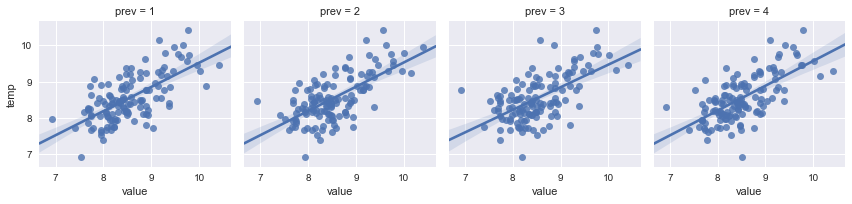

In [8]:
df = pd.read_csv('data/worldTemperature.csv')
df = colapsarK(df, 'temp', 4)
cols = ['prev{}'.format(i+1) for i in range(4)]
print(df.corr())
df = pd.melt(df, id_vars=['year', 'temp'], value_vars=cols)
df['prev'] = df['variable'].apply(lambda x: int(x[4:]))
df = df.sort_values(['year', 'prev'])
sns.lmplot(data=df, x='value', y='temp', col='prev', col_wrap=4, size=3)